In [1]:
import sys, os
sys.path.append('../')  # add parent directory to the system path

from utils_data import *
from utils_1batch import *

In [2]:
path_to_csv_file = os.path.join("../output", "data", "accuracy", "1batch.csv")
data = pd.read_csv(path_to_csv_file)

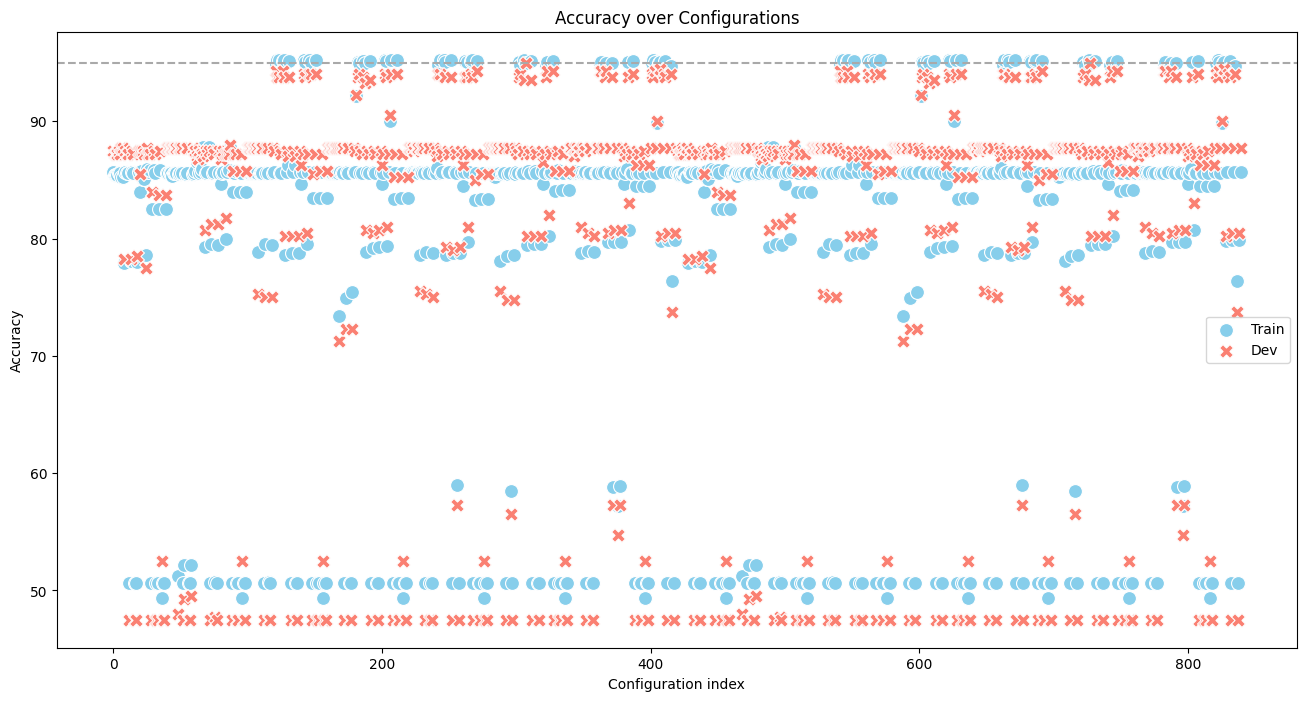

In [3]:
# data visualization
plt.figure(figsize=(16, 8))

# Using the index as the Configuration Index for plotting
data['Configuration index'] = data.index

# Plotting Train accuracies
sns.scatterplot(data=data, x="Configuration index", y="Train", marker="o", color="skyblue", s=100, label="Train")

# Plotting Dev accuracies
sns.scatterplot(data=data, x="Configuration index", y="Dev", marker="X", color="salmon", s=100, label="Dev")

# Plotting the horizontal line at y=94
plt.axhline(95, color="darkgrey", linestyle="--")

plt.title('Accuracy over Configurations')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Configuration index')
plt.grid(False)
plt.show()

In [4]:
# Subset the data where either "Train" or "Dev" accuracy is greater than 95
filter1 = data[(data["Train"] > 95) | (data["Dev"] > 95)]

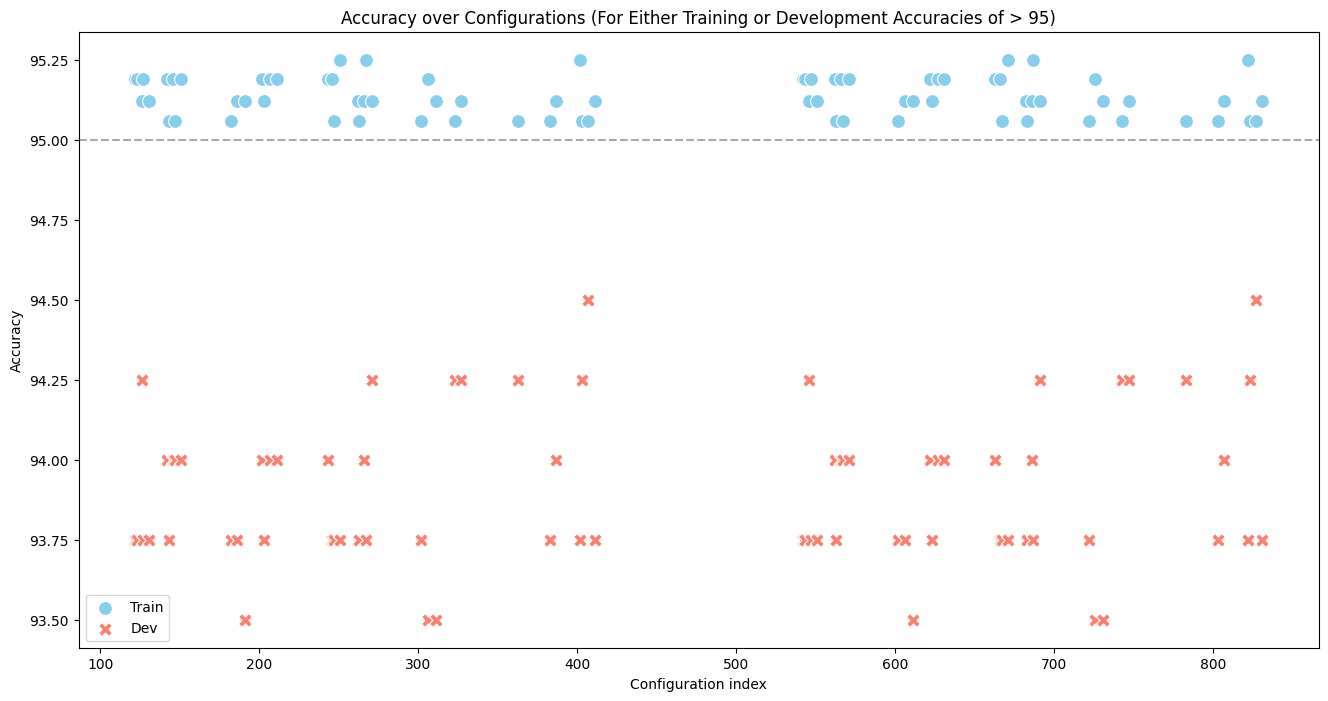

In [5]:
# data visualization
plt.figure(figsize=(16, 8))

# Plotting Train accuracies for the subset
sns.scatterplot(data=filter1, x="Configuration index", y="Train", marker="o", color="skyblue", s=100, label="Train")

# Plotting Dev accuracies for the subset
sns.scatterplot(data=filter1, x="Configuration index", y="Dev", marker="X", color="salmon", s=100, label="Dev")

# Plotting the horizontal line at y=94
plt.axhline(95, color="darkgrey", linestyle="--")

plt.title('Accuracy over Configurations (For Either Training or Development Accuracies of > 95)')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Configuration index')
plt.grid(False)
plt.show()

In [6]:
# Subset the data where the absolute difference between "Train" and "Dev" accuracies is less than or equal to 1%
filter2 = filter1[abs(filter1["Train"] - filter1["Dev"]) <= 1]

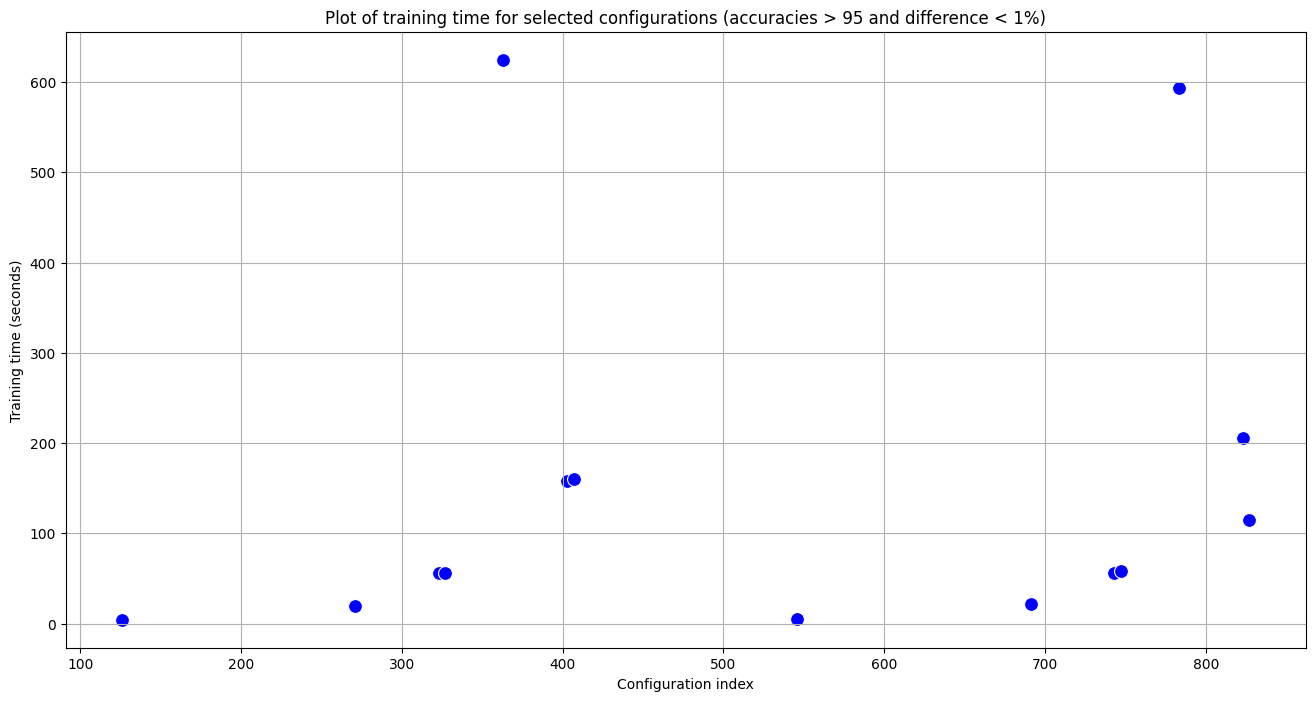

In [7]:
# looking at the training time
plt.figure(figsize=(16, 8))

# Plotting Training time over Configuration Index for the difference_subset
sns.scatterplot(data=filter2, x="Configuration index", y="Train time", color="blue", s=100)

plt.title('Plot of training time for selected configurations (accuracies > 95 and difference < 1%)')
plt.ylabel('Training time (seconds)')
plt.xlabel('Configuration index')
plt.grid(True)
plt.show()

In [8]:
# select configurations with training time of < 50 seconds
filter3 = filter2[(filter2["Train time"] < 30)]
print(filter3)

     Number of nodes Activation Batch type  Learning rate  Iterations  Train  \
126                3       tanh  one batch            0.6       10000  95.12   
271                5    sigmoid  one batch            0.1      100000  95.12   
546                3       tanh  one batch            0.6       10000  95.12   
691                5    sigmoid  one batch            0.1      100000  95.12   

       Dev  Train time  Configuration index  
126  94.25    4.341808                  126  
271  94.25   19.150660                  271  
546  94.25    4.754634                  546  
691  94.25   21.260333                  691  


In [19]:
N = 500
noise = 0.25
# load and visualize data
X, Y = load_data(N, noise)
X = X.T
Y =  Y.reshape(1, Y.shape[0])

In [20]:
import pickle

with open('../output/data/parameters/parameters_3_tanh_one batch_0.6_10000.pkl', 'rb') as file:
    parameters = pickle.load(file)

Y_hat = predict(X.T, parameters, "tanh")
accuracy = compute_accuracy(Y, Y_hat)
print(f"Accuracy: {accuracy} % ")

Accuracy: 93.6 % 
